In [310]:
#Define utility function
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def print_scoring_matrix(y_train, y_pred_array, final=False):
    
    p_score = precision_score(y_train, y_pred_array)
    r_score = recall_score(y_train, y_pred_array)
    f1 = f1_score(y_train, y_pred_array)
    auc_score = roc_auc_score(y_train, y_pred_array)
    
    fig = plt.figure(figsize=(8, 4))
    ax_p = fig.add_subplot(221)
    ax_r = fig.add_subplot(222)
    ax_f1 = fig.add_subplot(223)
    ax_auc = fig.add_subplot(224)
    
   
    
    # these are matplotlib.patch.Patch properties
    if final:
        props = dict(boxstyle='square', facecolor='g', alpha=0.5)
    else:
        props = dict(boxstyle='square', facecolor='w', alpha=0.5)

    # place a text box in upper left in axes coords
    ax_p.text(0, 0, r'$\ Prc=%.4f$' % (p_score, ),
              transform=ax_p.transAxes, fontsize=24, verticalalignment='top', bbox=props)
    ax_r.text(0, 0, r'$\ Rcl=%.4f$' % (r_score, ),
              transform=ax_r.transAxes, fontsize=24, verticalalignment='top', bbox=props)
    ax_f1.text(0, 0.7, r'$\ F1s=%.4f$ ' % (f1, ),
              transform=ax_f1.transAxes, fontsize=24, verticalalignment='top', bbox=props)
    ax_auc.text(0, 0.7, r'$\ Auc=%.4f$' % (auc_score, ),
              transform=ax_auc.transAxes, fontsize=24, verticalalignment='top', bbox=props)
    
    
    ax_p.set_axis_off()
    ax_r.set_axis_off()
    ax_f1.set_axis_off()
    ax_auc.set_axis_off()

    plt.show()

In [311]:
### IMPORT DATASET FROM CSV ###

import pandas as pd
import numpy as np

def load_raw_dataset(filename='full_set.csv'):
    df = pd.read_csv(filename)
    return df.reindex(np.random.RandomState(seed=42).permutation(df.index))
    
raw_dataset = load_raw_dataset()
raw_dataset.head(10)

,uic_1,country_1,name_1,lon_1,lat_1,uic_2,country_2,name_2,lon_2,lat_2,match
7785,1000001,FI,Helsinki,601018N,245629E,1031101,FI,HELSINKI,601016N,245629E,1
8692,1000001,FI,Helsinki,601018N,245629E,1000010,FI,PASILA,601155N,245600E,0
7799,1000010,FI,PASILA,601155N,245600E,1000010,FI,PASILA,601155N,245600E,1
18177,1000010,FI,PASILA,601155N,245600E,1031201,FI,KERAVA,602415N,250620E,0
25203,1000020,FI,Kerava/Kervo,602415N,250622E,1031201,FI,KERAVA,602415N,250620E,1
4783,1000020,FI,Kerava/Kervo,602415N,250622E,1031203,FI,JARVENPAA,602824N,250525E,0
26200,1000025,FI,Järvenpää,602825N,250527E,1031203,FI,JARVENPAA,602824N,250525E,1
23173,1000025,FI,Järvenpää,602825N,250527E,1031310,FI,HYVINKAA,603752N,245127E,0
15311,1000030,FI,Hyvinkää/Hyvinge,603751N,245126E,1031310,FI,HYVINKAA,603752N,245127E,1
8729,1000030,FI,Hyvinkää/Hyvinge,603751N,245126E,1031301,FI,RIIHIMAKI,604407N,244652E,0


In [312]:
# SPLIT DATASET TEST/TRAIN ###

dataset_x = pd.DataFrame(columns=['uic_1','name_1','uic_2','name_2'])
dataset_y = pd.DataFrame(columns=['match'])

for index, frame in raw_dataset.iterrows():
    dataset_x = dataset_x.append({
    "uic_1": frame[0],
    "name_1": frame[2],
    "uic_2":  frame[5],
    "name_2":  frame[7],
      }, ignore_index=True)

    dataset_y = dataset_y.append({"match": frame[10],}, ignore_index=True)

In [313]:
div = 26535

X_train, X_test, y_train, y_test = dataset_x[:div], dataset_x[div:],dataset_y[:div], dataset_y[div:]
y_train=y_train.astype('int')

In [314]:
dataset_x.head()

,uic_1,name_1,uic_2,name_2
0,1000001,Helsinki,1031101,HELSINKI
1,1000001,Helsinki,1000010,PASILA
2,1000010,PASILA,1000010,PASILA
3,1000010,PASILA,1031201,KERAVA
4,1000020,Kerava/Kervo,1031201,KERAVA


In [315]:
dataset_y.head()

,match
0,1
1,0
2,1
3,0
4,1


In [322]:
import itertools
import matplotlib
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_test, y_pred, classes,                          
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    plt.figure()
    plt.rcParams["figure.figsize"]=16,8
    
    cm_normalized = cm.astype('float')*100 / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size="24")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 verticalalignment='bottom',
                 size="24",
                 color="white" if cm[i, j] > thresh else "black")
        
    for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
        plt.text(j, i, format(cm_normalized[i, j], '.1f') + "%",
             horizontalalignment='center',
             verticalalignment='top',
             size="18",
             color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()    
    plt.show()


In [317]:
import unicodedata as ud
def normalize_string(input):

    input = input.lower()
    input = ''.join(c for c in input if c not in ",-' ")
    input = ud.normalize('NFC',input)

    return str(input)

y_pred = dict()
y_pred_array = list()
hit = 0
for index, frame in X_train.iterrows():
    y_pred[index] = 0
    if frame[0] == frame[3]:
        y_pred[index] = 1
        continue

    if normalize_string(frame[1]) == normalize_string(frame[3]):        
        hit = hit+1
        y_pred[index] = 1
        continue

import collections


y_pred = collections.OrderedDict(sorted(y_pred.items()))
for i, (key, value) in enumerate(y_pred.items()):
    y_pred_array.append(value)


    

In [318]:
tp, tn, fp, fn = 0,0,0,0
for index, frame in y_train.iterrows():
    if frame[0] == 1:
        if y_pred[index] == 1:
            tp = tp+1
        else:
            fn = fn+1
            
    if frame[0] == 0:
        if y_pred[index] == 1:
            fp = fp+1
        else:
            tn = tn+1


In [319]:
from sklearn.metrics import confusion_matrix
cm = [[tn, fp],[fn,tp]]

print(cm)
#print(y_train)
#print(y_pred_array)
cm = confusion_matrix(y_train, y_pred_array)


[[13262, 5], [3401, 9867]]


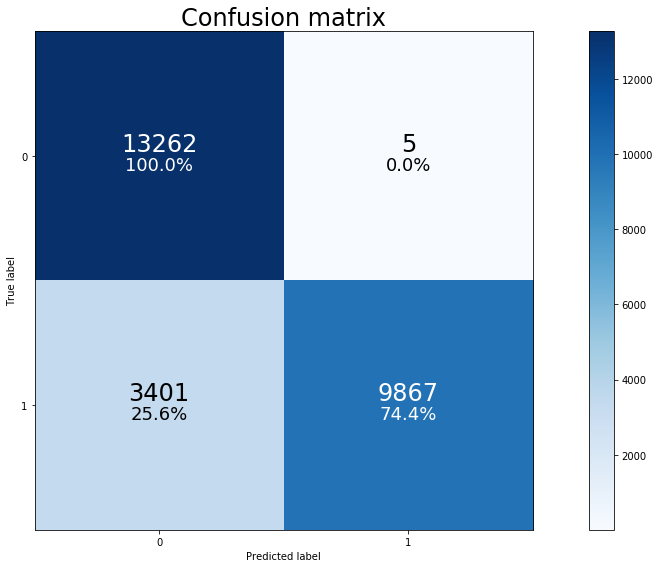

In [323]:
plot_confusion_matrix(y_train, y_pred_array, (0,1))

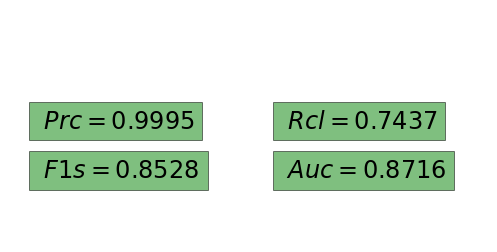

In [324]:
print_scoring_matrix(y_train, y_pred_array, True)